In [1]:
#import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import warnings

In [2]:
warnings.simplefilter('ignore')

In [3]:
data = pd.read_excel('whi-2019.xlsx')

In [4]:
data.drop(columns="Overall rank", inplace=True)

In [5]:
data

Country or region  Score  GDP per capita  Social support  \
0                     Finland  7.769           1.340           1.587   
1                     Denmark  7.600           1.383           1.573   
2                      Norway  7.554           1.488           1.582   
3                     Iceland  7.494           1.380           1.624   
4                 Netherlands  7.488           1.396           1.522   
..                        ...    ...             ...             ...   
151                    Rwanda  3.334           0.359           0.711   
152                  Tanzania  3.231           0.476           0.885   
153               Afghanistan  3.203           0.350           0.517   
154  Central African Republic  3.083           0.026           0.000   
155               South Sudan  2.853           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.986                         0.596       0.153   
1                      0.996                         0.592       0.252   
2                      1.028                         0.603       0.271   
3                      1.026                         0.591       0.354   
4                      0.999                         0.557       0.322   
..                       ...                           ...         ...   
151                    0.614                         0.555       0.217   
152                    0.499                         0.417       0.276   
153                    0.361                         0.000       0.158   
154                    0.105                         0.225       0.235   
155                    0.295                         0.010       0.202   

     Perceptions of corruption  
0                        0.393  
1                        0.410  
2                        0.341  
3                        0.118  
4                        0.298  
..                         ...  
151                      0.411  
152                      0.147  
153                      0.025  
154                      0.035  
155                      0.091  

[156 rows x 8 columns]

In [6]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [7]:
data['Continent'] = 'cont'

In [8]:
data['Country or region'].loc[38] = 'Trinidad and Tobago'
data['Country or region'].loc[102] = 'Congo'
data['Country or region'].loc[109] = 'Palestine'
data['Country or region'].loc[126] = 'Democratic Republic of the Congo'

In [9]:
for i in range(data.shape[0]):
    if data['Country or region'].iloc[i] == 'Kosovo':
        data['Continent'].iloc[i] = 'Europe'
    else:
        data['Continent'].iloc[i] = country_to_continent(data['Country or region'].iloc[i])

In [10]:
data.head()

Country or region  Score  GDP per capita  Social support  \
0           Finland  7.769           1.340           1.587   
1           Denmark  7.600           1.383           1.573   
2            Norway  7.554           1.488           1.582   
3           Iceland  7.494           1.380           1.624   
4       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption Continent  
0                      0.393    Europe  
1                      0.410    Europe  
2                      0.341    Europe  
3                      0.118    Europe  
4                      0.298    Europe

In [11]:
data['Continent'].value_counts()

Asia             46
Africa           45
Europe           40
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

In [12]:
list_a = [['Africa', round(data.loc[data['Continent'] == 'Africa', 'Score'].mean(),3)],
          ['Asia', round(data.loc[data['Continent'] == 'Asia', 'Score'].mean(),3)],
          ['Europe', round(data.loc[data['Continent'] == 'Europe', 'Score'].mean(),3)],
          ['North America', round(data.loc[data['Continent'] == 'North America', 'Score'].mean(),3)],
          ['Oceania', round(data.loc[data['Continent'] == 'Oceania', 'Score'].mean(),3)],
          ['South America', round(data.loc[data['Continent'] == 'South America', 'Score'].mean(),3)]
]

In [13]:
data_continent = pd.DataFrame(list_a, columns = ['Continent', 'Score'])

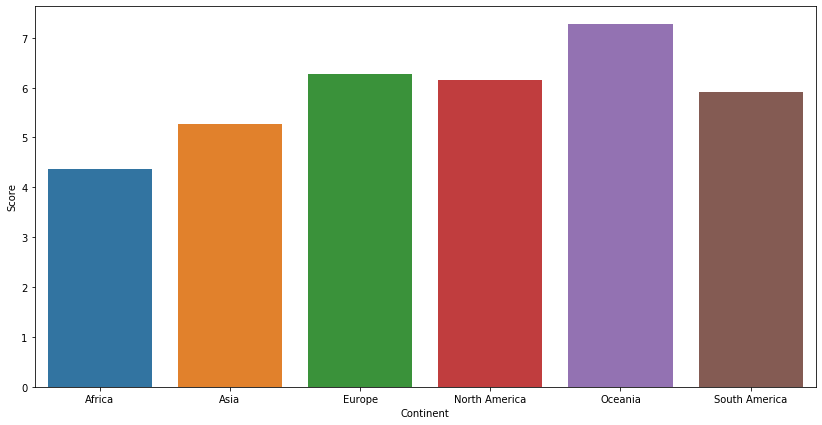

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x = (data[['Continent', 'Score']].groupby('Continent').mean()).index, y = (data[['Continent', 'Score']].groupby('Continent').mean())['Score']);

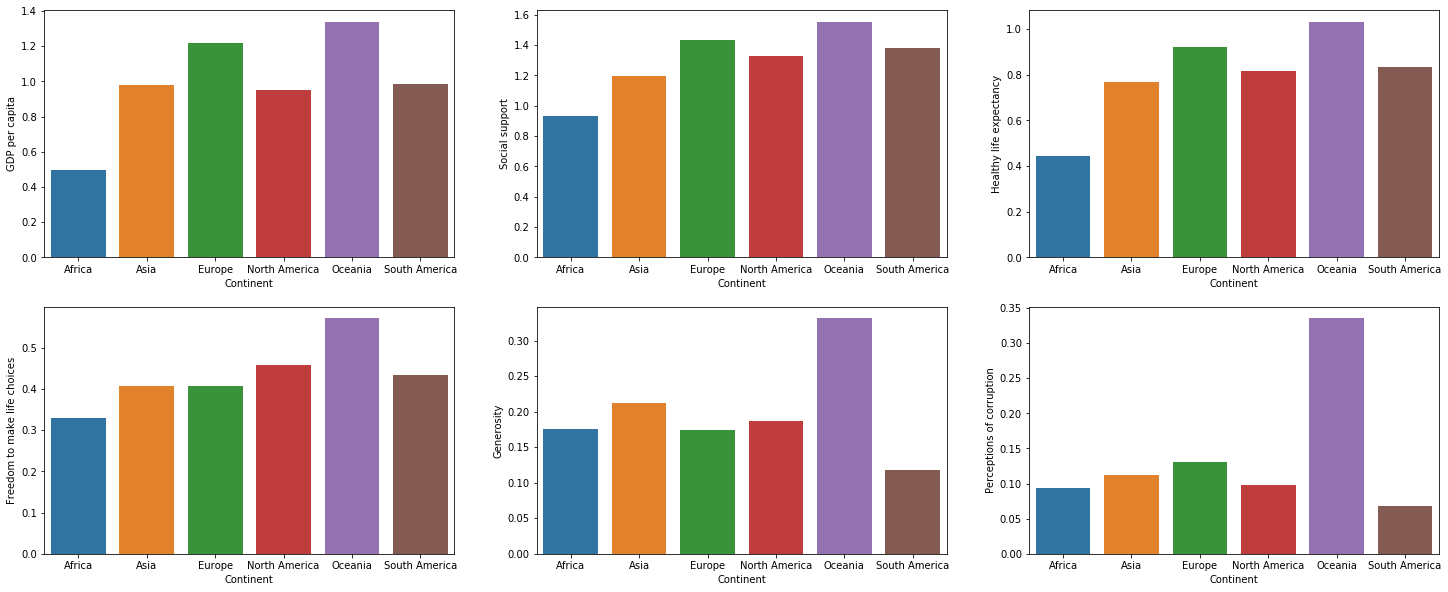

In [15]:
list_classes = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
for i in range(len(list_classes)):
    if i < 3:
        sns.barplot(x = (data[['Continent', list_classes[i]]].groupby('Continent').mean()).index, y = (data[['Continent', list_classes[i]]].groupby('Continent').mean())[list_classes[i]], ax=ax[0][i]);
    else:
        sns.barplot(x = (data[['Continent', list_classes[i]]].groupby('Continent').mean()).index, y = (data[['Continent', list_classes[i]]].groupby('Continent').mean())[list_classes[i]], ax=ax[1][i-3]);
    

In [16]:
import plotly.graph_objs as go
from plotly.offline import iplot

data_map = dict(type = 'choropleth', 
           locations = data['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = data['Score'], 
           text = data['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'mercator'}))

choromap3 = go.Figure(data = [data_map], layout=layout)
iplot(choromap3)

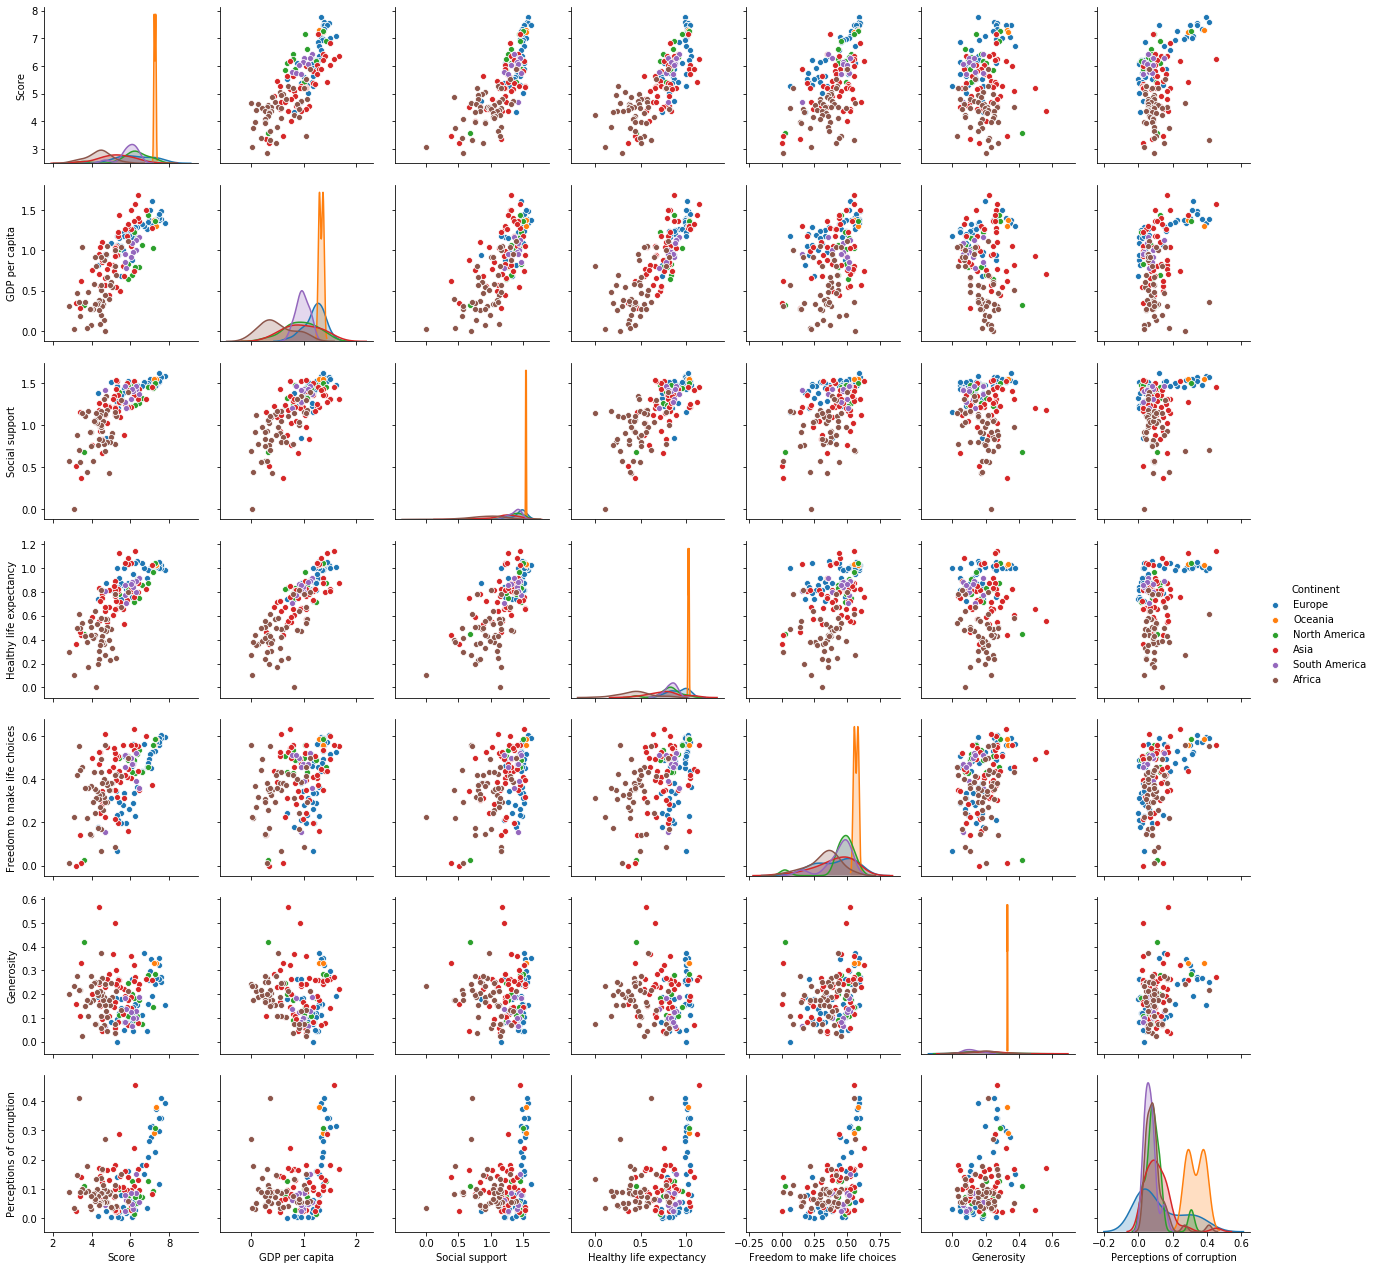

In [17]:
sns.pairplot(data = data.drop(columns=["Country or region"]), hue = 'Continent')

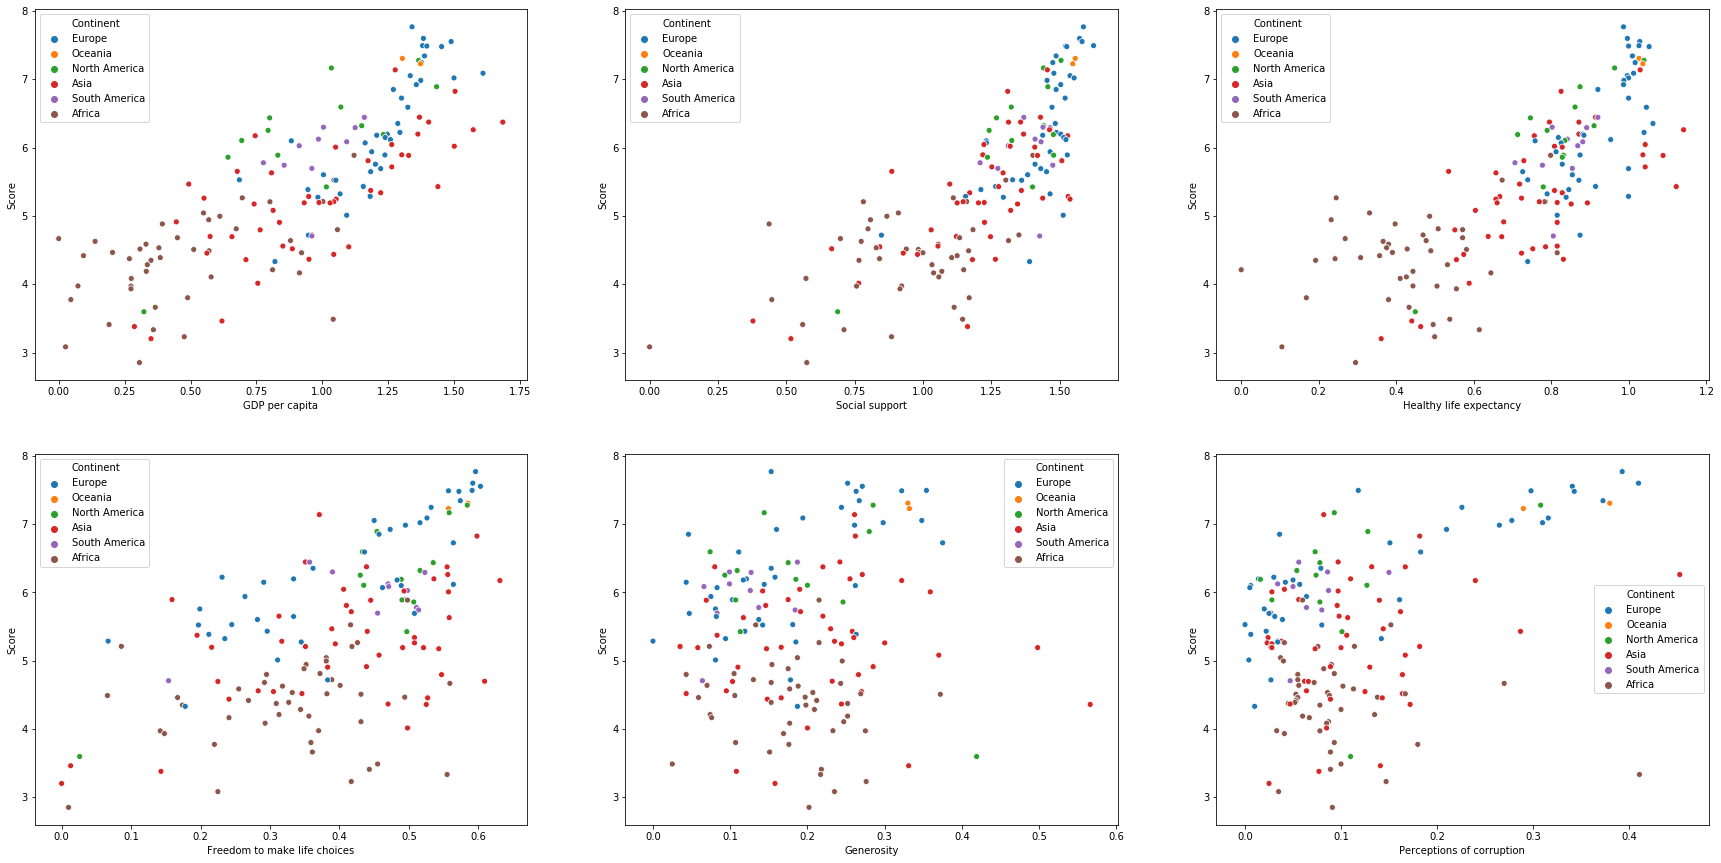

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
sns.scatterplot(data=data, x='GDP per capita', y='Score', ax=ax[0][0], hue = 'Continent');
sns.scatterplot(data=data, x='Social support', y='Score', ax=ax[0][1], hue = 'Continent');
sns.scatterplot(data=data, x='Healthy life expectancy', y='Score', ax=ax[0][2], hue = 'Continent');
sns.scatterplot(data=data, x='Freedom to make life choices', y='Score', ax=ax[1][0], hue = 'Continent');
sns.scatterplot(data=data, x='Generosity', y='Score', ax=ax[1][1], hue = 'Continent');
sns.scatterplot(data=data, x='Perceptions of corruption', y='Score', ax=ax[1][2], hue = 'Continent');

In [19]:
data.describe()

Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   0.094538  
min                        0.000000    0.000000                   0.000000  
25%                        0.308000    0.108750                   0.047000  
50%                        0.417000    0.177500                   0.085500  
75%                        0.507250    0.248250                   0.141250  
max                        0.631000    0.566000                   0.453000

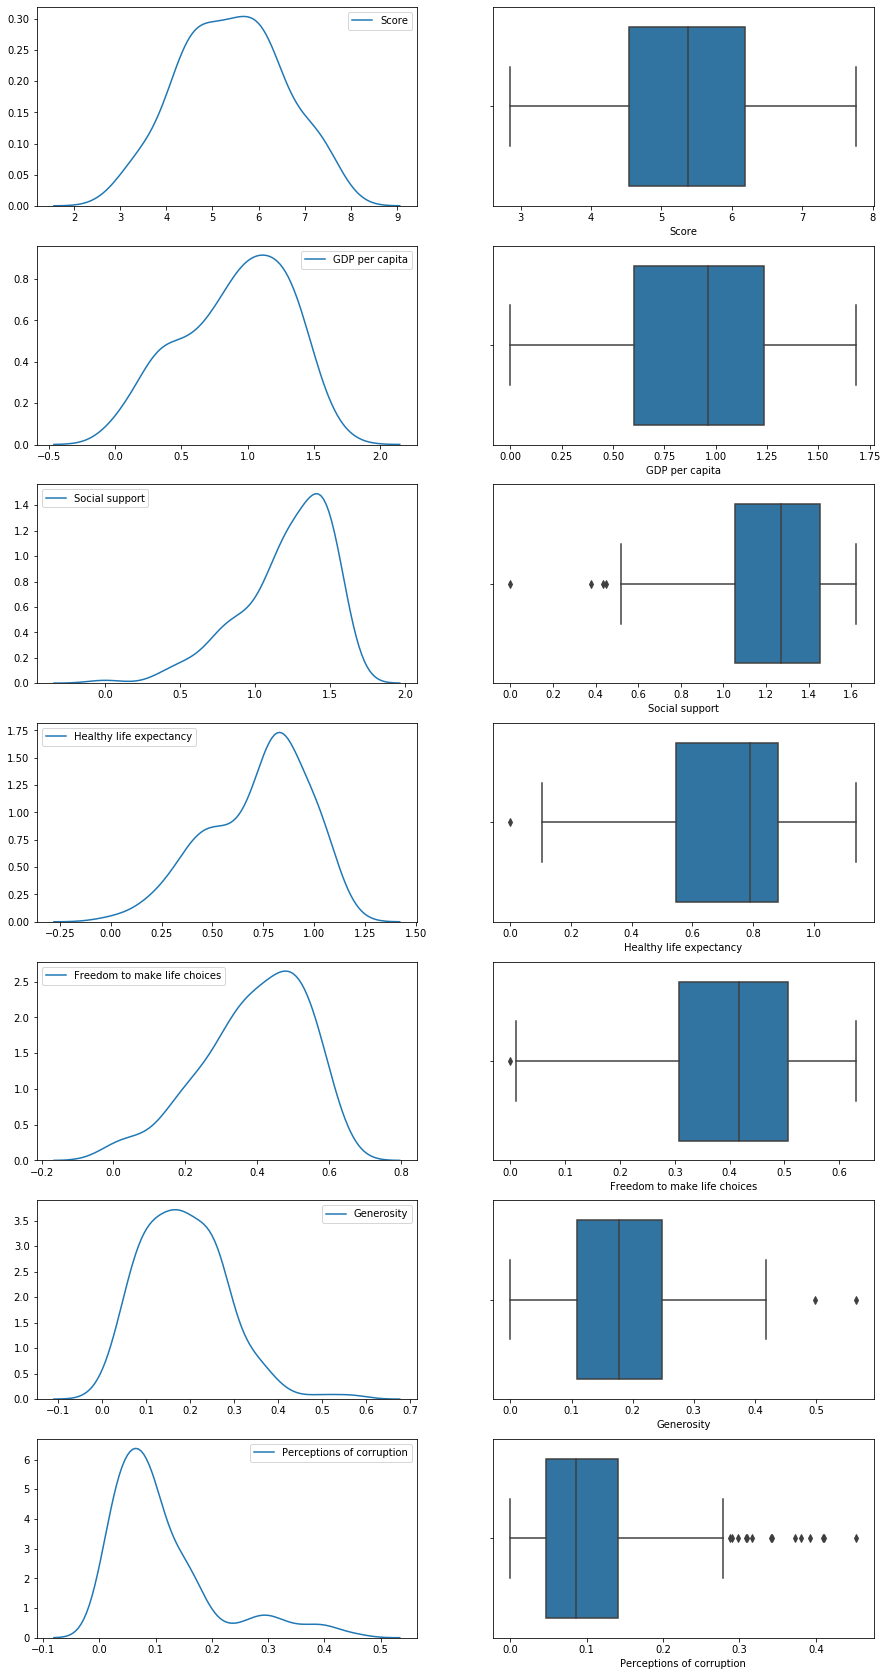

In [20]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

sns.kdeplot(data.Score,ax=ax[0][0]);
sns.boxplot(x=data['Score'], ax=ax[0][1]);

sns.kdeplot(data['GDP per capita'],ax=ax[1][0]);
sns.boxplot(x=data['GDP per capita'], ax=ax[1][1]);

sns.kdeplot(data['Social support'],ax=ax[2][0]);
sns.boxplot(x=data['Social support'], ax=ax[2][1]);

sns.kdeplot(data['Healthy life expectancy'],ax=ax[3][0]);
sns.boxplot(x=data['Healthy life expectancy'], ax=ax[3][1]);

sns.kdeplot(data['Freedom to make life choices'],ax=ax[4][0]);
sns.boxplot(x=data['Freedom to make life choices'], ax=ax[4][1]);

sns.kdeplot(data['Generosity'],ax=ax[5][0]);
sns.boxplot(x=data['Generosity'], ax=ax[5][1]);

sns.kdeplot(data['Perceptions of corruption'],ax=ax[6][0]);
sns.boxplot(x=data['Perceptions of corruption'], ax=ax[6][1]);



In [21]:
    stats = data.describe()
    stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%'] # appending interquartile range instead of recalculating it
    stats = stats.append(data.reindex(stats.columns, axis=1).agg(['skew', 'mad', 'kurt']))
    stats


Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   
IQR      1.640000        0.629750        0.396750                 0.334000   
skew     0.011450       -0.385232       -1.134728                -0.613841   
mad      0.916649        0.332705        0.236096                 0.199222   
kurt    -0.608375       -0.769902        1.229005                -0.302895   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   0.094538  
min                        0.000000    0.000000                   0.000000  
25%                        0.308000    0.108750                   0.047000  
50%                        0.417000    0.177500                   0.085500  
75%                        0.507250    0.248250                   0.141250  
max                        0.631000    0.566000                   0.453000  
IQR                        0.199250    0.139500                   0.094250  
skew                      -0.685636    0.745942                   1.650410  
mad                        0.116578    0.075545                   0.069003  
kurt                      -0.068857    1.173189                   2.416824

In [22]:
corrmat = data.corr()
top_corr_features = corrmat.index

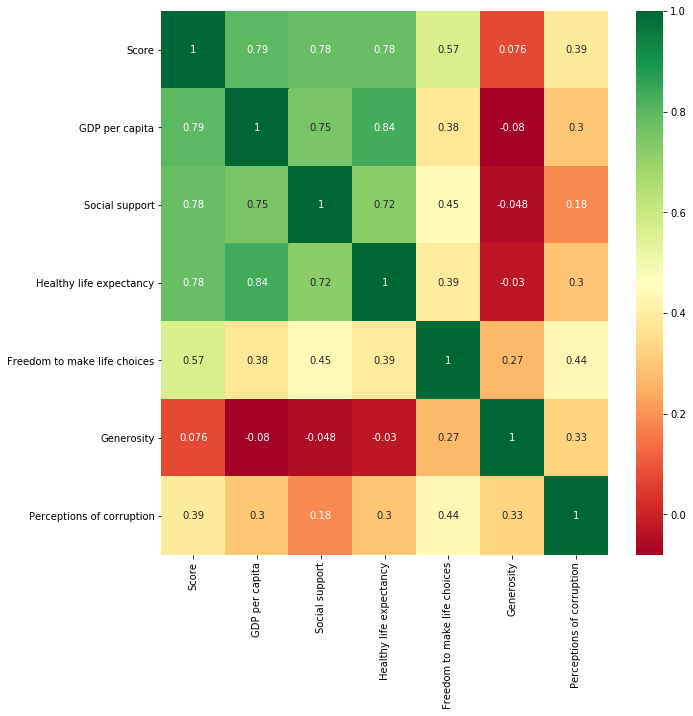

In [23]:
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

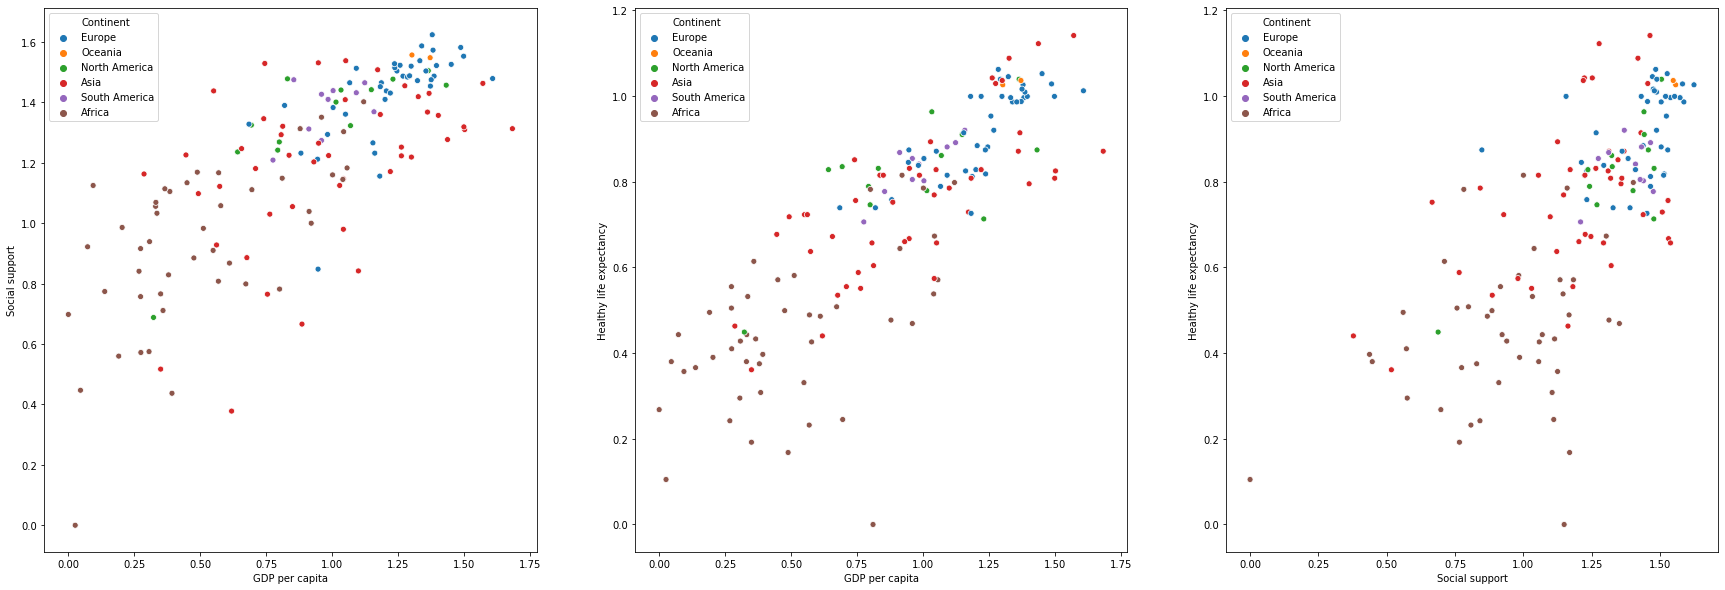

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.scatterplot(data=data, x='GDP per capita', y='Social support', ax=ax[0], hue = 'Continent');
sns.scatterplot(data=data, x='GDP per capita', y='Healthy life expectancy', ax=ax[1], hue = 'Continent');
sns.scatterplot(data=data, x='Social support', y='Healthy life expectancy', ax=ax[2], hue = 'Continent');


## PCA

In [25]:
from sklearn.decomposition import PCA
data_pca = data.drop(columns=["Country or region", 'Continent'])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
data_pca_norm = data.drop(columns=["Country or region", 'Continent'])
data_pca_norm = StandardScaler().fit_transform(data_pca_norm)

In [28]:
pca_norm = PCA(n_components=7)
pca_norm.fit(data_pca_norm)

v = pca_norm.transform(data_pca_norm)

In [29]:
list_percum = list(np.cumsum(pca_norm.explained_variance_ratio_)*100)
list_per = list(pca_norm.explained_variance_ratio_*100)
list_eigen = list(pca_norm.explained_variance_)
table_eigen = pd.DataFrame({'Eigen value':list_eigen, 'Percentage':list_per, 'Cum Sum':list_percum})
table_eigen

Eigen value  Percentage     Cum Sum
0     3.837141   54.464917   54.464917
1     1.436346   20.387702   74.852619
2     0.616839    8.755504   83.608123
3     0.559896    7.947247   91.555369
4     0.263794    3.744327   95.299697
5     0.173418    2.461516   97.761213
6     0.157726    2.238787  100.000000

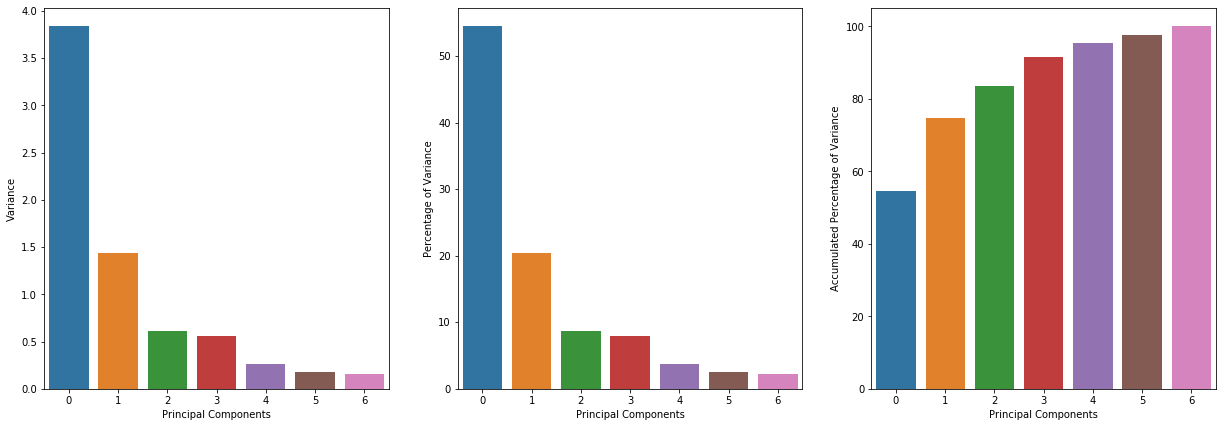

In [30]:
features_norm = range(pca_norm.n_components_)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(21, 7))
ax[0].set(xlabel='Principal Components', ylabel='Variance')
ax[1].set(xlabel='Principal Components', ylabel='Percentage of Variance')
ax[2].set(xlabel='Principal Components', ylabel='Accumulated Percentage of Variance')
sns.barplot(x = list(features_norm), y= pca_norm.explained_variance_, ax=ax[0])
sns.barplot(x = list(features_norm), y= (pca_norm.explained_variance_ratio_)*100, ax=ax[1])
sns.barplot(x = list(features_norm), y= np.array(list_percum), ax=ax[2])

In [31]:
comp = pca_norm.components_
comp

array([[-0.47586069, -0.4548248 , -0.43658226, -0.45015043, -0.33220068,
        -0.04823293, -0.2465113 ],
       [-0.02837147, -0.21337704, -0.20714812, -0.17785645,  0.3621298 ,
         0.69380874,  0.51634628],
       [ 0.07150504, -0.04959844,  0.25864534,  0.00087319,  0.10635862,
         0.57700863, -0.76241572],
       [-0.007975  ,  0.2429077 , -0.05916916,  0.27778025, -0.80784375,
         0.42249514,  0.17075046],
       [ 0.08099658, -0.20442963,  0.74155642, -0.5325234 , -0.25689731,
        -0.01038139,  0.22816001],
       [-0.85414928,  0.06863729,  0.36575462,  0.31810206,  0.14826167,
         0.03484952,  0.08692841],
       [-0.17732359,  0.79977368, -0.11137694, -0.5511796 ,  0.08126056,
         0.05949494, -0.05071198]])

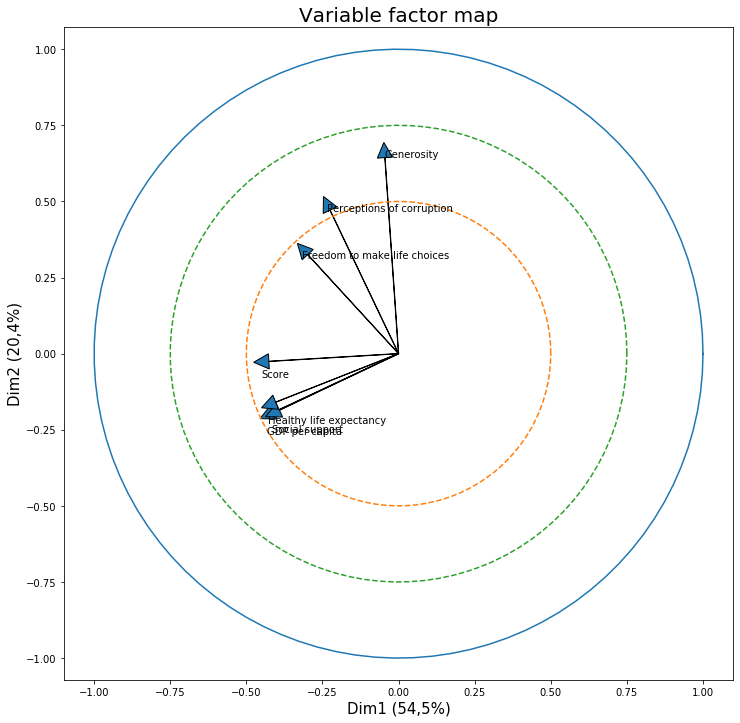

In [32]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca_norm.components_)):
    ax.arrow(0, 0,  # Start the arrow at the origin
             pca_norm.components_[0, i], pca_norm.components_[1, i],  # 0 and 1 correspond to dimension 1 and 2
             head_width=0.05,head_length=0.05, length_includes_head = True)
    plt.text(pca_norm.components_[0, i] * 0.95, pca_norm.components_[1, i] - 0.05, data.columns.values[i+1])
 
an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
plt.plot(np.cos(an), np.sin(an))
plt.plot(np.cos(an)*(1/2), np.sin(an)*(1/2), linestyle = '--')
plt.plot(np.cos(an)*(3/4), np.sin(an)*(3/4), linestyle = '--')
plt.axis('equal')
ax.set_xlabel('Dim1 (54,5%)', fontsize=15)
ax.set_ylabel('Dim2 (20,4%)', fontsize=15)
ax.set_title('Variable factor map', fontsize=20)
plt.show()

In [33]:
df = pd.DataFrame(dict(comp1=v[:,0], comp2=v[:,1], continente= data['Continent']))

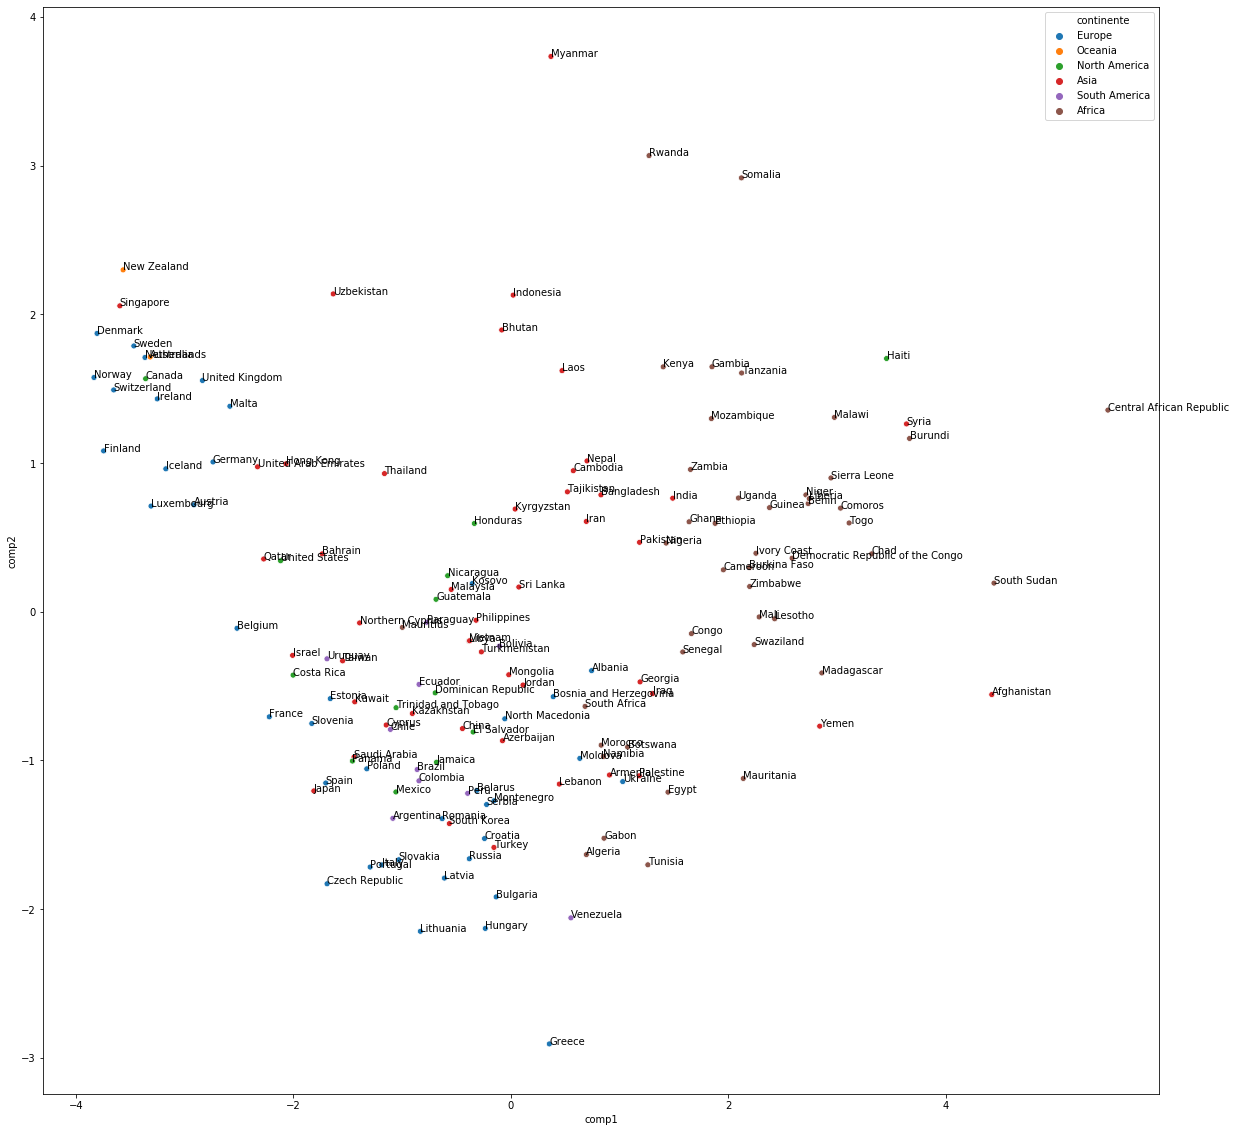

In [34]:
fig, ax = plt.subplots(figsize=(20,20));
sns.scatterplot('comp1', 'comp2', data=df, hue='continente', ax=ax);

for i in range (len(v[:,1])):
    plt.text(df['comp1'][i], df['comp2'][i], s= data['Country or region'][i]);

plt.show();

## Factor analysis

we must check if factor analysis is feasible. Bartlett Sphericity Test is a check of intercorrelation between manifest variables, which means the comparison of the observed correlation matrix and the identity matrix. If factor analysis is an appropriate method to use, the correlation matrix and the identity matrix will not be the same, and the test will be significant.The Bartlett Sphericity Test based on data produced a significant p-value of 0.0.

Next, the KMO test (Kaiser-Meyer-Olkin) should test whether it is appropriate to use the manifest variables for factor analysis. The test involves the computation of the proportion of variance among the manifest variables. The KMO values range between 0-1 and a proportion under 0.6 would suggest that the dataset is inappropriate for factor analysis. Our data is considered worthy with the KMO test at 0.83.

In [35]:
from factor_analyzer import FactorAnalyzer

In [36]:
data_fa_norm = data.drop(columns=["Country or region", 'Continent'])
data_fa_norm = StandardScaler().fit_transform(data_pca_norm)

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_fa_norm)
print('KMO score: {}'.format(kmo_model))

KMO score: 0.8364480877374135


In [38]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_fa_norm)
chi_square_value, p_value

(657.8740708429464, 5.0311280730138984e-126)

In [39]:
fa = FactorAnalyzer(rotation = None)
fa.fit(data_fa_norm, 7)
ev, v = fa.get_eigenvalues()
ev

array([3.81254416, 1.42713915, 0.61288527, 0.55630728, 0.26210292,
       0.17230612, 0.1567151 ])

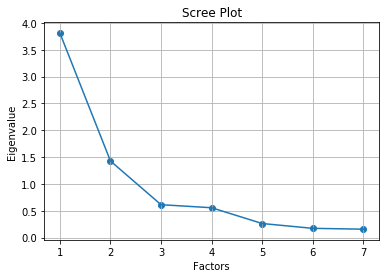

In [40]:
plt.scatter(range(1,data_fa_norm.shape[1]+1),ev)
plt.plot(range(1,data_fa_norm.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [41]:
fa = FactorAnalyzer(rotation = "varimax")
fa.fit(data_fa_norm, 2)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [42]:
fa.get_factor_variance()

(array([3.33401348, 1.15448207, 0.26981672]),
 array([0.47628764, 0.16492601, 0.03854525]),
 array([0.47628764, 0.64121365, 0.6797589 ]))

In [43]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(2, rotation="varimax", method='principal', use_smc=True)
fa.fit(data_fa_norm)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

fa.loadings_


array([[ 0.88696247,  0.27887592],
       [ 0.92218706,  0.05685545],
       [ 0.88613001,  0.05195258],
       [ 0.89939099,  0.09379162],
       [ 0.4665625 ,  0.62467083],
       [-0.18850905,  0.81259872],
       [ 0.24725825,  0.74231927]])

These values are called the loadings, and they describe how much each variable contributes to a particular principal component. Large loadings (positive or negative) indicate that a particular variable has a strong relationship to a particular principal component. The sign of a loading indicates whether a variable and a principal component are positively or negatively correlated.

Interpretar:
PCA1 is highly correlated with the firt 4 variables, PCA2 is highly correlated with the last 3



In [44]:
fa.get_communalities()

array([0.8644742 , 0.85366152, 0.78792547, 0.81770102, 0.60789421,
       0.69585234, 0.61217455])

Communalities is the proportion of each variable's variance that can be explained by the factors (example 86% of the score is explained by the factors)

Interpretar:

All communalities are high (all variables are highly explained by the factors) so no variables are removed.